<div id="header">
        <p style="float: left; width: 34%; text-align: left;">VIDHI JATIN SHAH</p>
    <h1 style="float: left; width: 33%; text-align: center;">LAB 4-Wordcount on tweets</h1>
    <p style="float: left; width: 33%; text-align: right;">UBPerson No:50207090</p>
</div>

1. Imports all the important libraries
  * twitteR-->package for collecting twitter data.
  * reshape2
  * splitstackshape
  * wordcloud

In [73]:
#install.packages("wordcloud",repos = "http://cran.us.r-project.org")
#install.packages("splitstackshape",repos = "http://cran.us.r-project.org")
library(twitteR)
library(reshape2)
library(splitstackshape)
library(wordcloud)

* Twitter application credentials(Customer API key, Customer API secret, Access Token Key and Access Token Secret) required for authentication.

In [7]:
consumer_key <- 'gnJvXlQ5HLyNTgyawqQppn2w9'
consumer_secret <- 'OurjB7Zk3x4n7WIPGCGn72IOwlsxAg7h95198VtO8iO2mIyuY3'
access_token <- '771351448554799105-Q4Zaagzq4rXRzvOu7CSkS74uD4cOliK'
access_secret <- '9gmew43fn2ZiI1zLtdCdONiNp30EjLBuhVvPMeogaVKmt'
setup_twitter_oauth(consumer_key, consumer_secret, access_token, access_secret)

* function searches for the tweets on the selected topics.

In [21]:
tweets1<-searchTwitter('Gerrard',n=3000,lang='en')
tweets2<-searchTwitter('Messi',n=3000,lang='en')
tweets3<-searchTwitter('Ronaldo',n=3000,lang='en')

* strip_retweets() removes retweets from the list of tweets 

In [22]:
tweets1<-strip_retweets(tweets1)
tweets2<-strip_retweets(tweets2)
tweets3<-strip_retweets(tweets3)

* Return a data.frame of list of tweets

In [24]:
tweets1df<-twListToDF(tweets1)
tweets2df<-twListToDF(tweets2)
tweets3df<-twListToDF(tweets3)

* The collected tweets are stored in 3 different txt files after which pre-processing is done and the word count using MapReduce on HDFS is performed on relevant data .

In [25]:
write(tweets1df$text, file="tweets\\tweets1.txt")
write(tweets2df$text, file="tweets\\tweets2.txt")
write(tweets3df$text, file="tweets\\tweets3.txt")

*  We read the WordCount of each word and convert it to a data frame.

In [2]:
file<-readLines("WordCountOutput\\part-r-00000", n = -1)
df<-as.data.frame(file)

* cSplit() splits the dataframe into two different columns one for word and second that has the count for it. 

In [76]:
df<-cSplit(df, "file", "\t")
colnames(df) <- c("word", "count")

* wordcloud is plotted for the tweets collected.

Warning message in wordcloud(df$word, df$count, c(8, 0.3), random.order = FALSE):
"ramos could not be fit on page. It will not be plotted."Warning message in wordcloud(df$word, df$count, c(8, 0.3), random.order = FALSE):
"respect could not be fit on page. It will not be plotted."Warning message in wordcloud(df$word, df$count, c(8, 0.3), random.order = FALSE):
"though could not be fit on page. It will not be plotted."Warning message in wordcloud(df$word, df$count, c(8, 0.3), random.order = FALSE):
"useless could not be fit on page. It will not be plotted."Warning message in wordcloud(df$word, df$count, c(8, 0.3), random.order = FALSE):
"watching could not be fit on page. It will not be plotted."

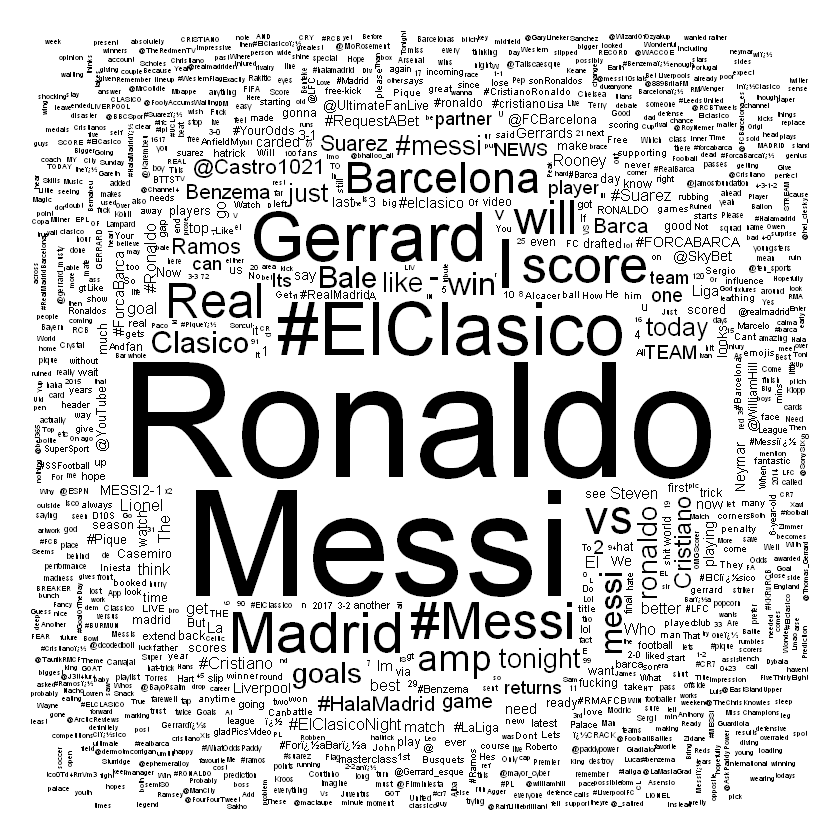

In [78]:
wordcloud(df$word,df$count,c(8,.3),random.order=FALSE)